In [1]:
pip install pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D 

In [3]:
data = pd.read_csv(r'D:\Teks 2024\imdb_top_2000_movies.csv')

In [4]:
data.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN


In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    2000 non-null   object 
 1   Release Year  2000 non-null   object 
 2   Duration      2000 non-null   int64  
 3   IMDB Rating   2000 non-null   float64
 4   Metascore     1919 non-null   float64
 5   Votes         2000 non-null   object 
 6   Genre         2000 non-null   object 
 7   Director      2000 non-null   object 
 8   Cast          2000 non-null   object 
 9   Gross         1903 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 156.4+ KB


,Duration,IMDB Rating,Metascore
count,2000.000000,2000.000000,1919.000000
mean,113.939000,6.922600,61.044294
std,22.946035,0.955618,17.937722
min,50.000000,1.500000,9.000000
25%,98.000000,6.400000,48.000000
50%,110.000000,7.000000,61.000000
75%,125.000000,7.600000,74.000000
max,271.000000,9.300000,100.000000


In [6]:
data.shape

(2000, 10)

In [10]:
data['Gross'] = data['Gross'].str.replace('$', '').str.replace('M', '').str.replace(',', '').astype(float) * 1e6

In [11]:
data.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,134970000.0
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,57300000.0
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,54800000.0
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,44820000.0
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN


In [13]:
null_columns = data.columns[data.isnull().any()]
print(null_columns)

Index(['Metascore', 'Gross'], dtype='object')


In [14]:
data['Metascore'].fillna(data['Metascore'].median(),inplace=True)
data['Gross'].fillna(data['Gross'].median(),inplace=True)

In [15]:
data.isnull().sum()

Movie Name      0
Release Year    0
Duration        0
IMDB Rating     0
Metascore       0
Votes           0
Genre           0
Director        0
Cast            0
Gross           0
dtype: int64

In [21]:
top10_grossing_movies = data.sort_values(by='Gross', ascending=False).head(10)
print("Top 10 Grossing Movies:")
print(top10_grossing_movies[['Movie Name', 'Gross']])

Top 10 Grossing Movies:
                                      Movie Name        Gross
1763                                      Avatar  760510000.0
511                                      Titanic  659330000.0
1508                             The Dark Knight  534860000.0
764    Star Wars: Episode I - The Phantom Menace  474540000.0
1076                                     Shrek 2  436470000.0
350                   E.T. the Extra-Terrestrial  435110000.0
1263  Pirates of the Caribbean: Dead Man's Chest  423320000.0
516                                The Lion King  422780000.0
1797                                 Toy Story 3  415000000.0
1012                                  Spider-Man  403710000.0


In [20]:
bottom10_grossing_movies = data.sort_values(by='Gross').head(10)
print("Bottom 10 Grossing Movies:")
print(bottom10_grossing_movies[['Movie Name', 'Gross']])

Bottom 10 Grossing Movies:
                                            Movie Name    Gross
1682                                     The Condemned      0.0
41                                   Dial M for Murder  10000.0
44                                       All About Eve  10000.0
1173                                    Salinui chueok  10000.0
1773                                         Eden Lake  10000.0
161                                        City Lights  20000.0
1679                                          Cashback  20000.0
1776                                        Bitch Slap  20000.0
1951                                        Wild Child  20000.0
1686  Dear Zachary: A Letter to a Son About His Father  20000.0


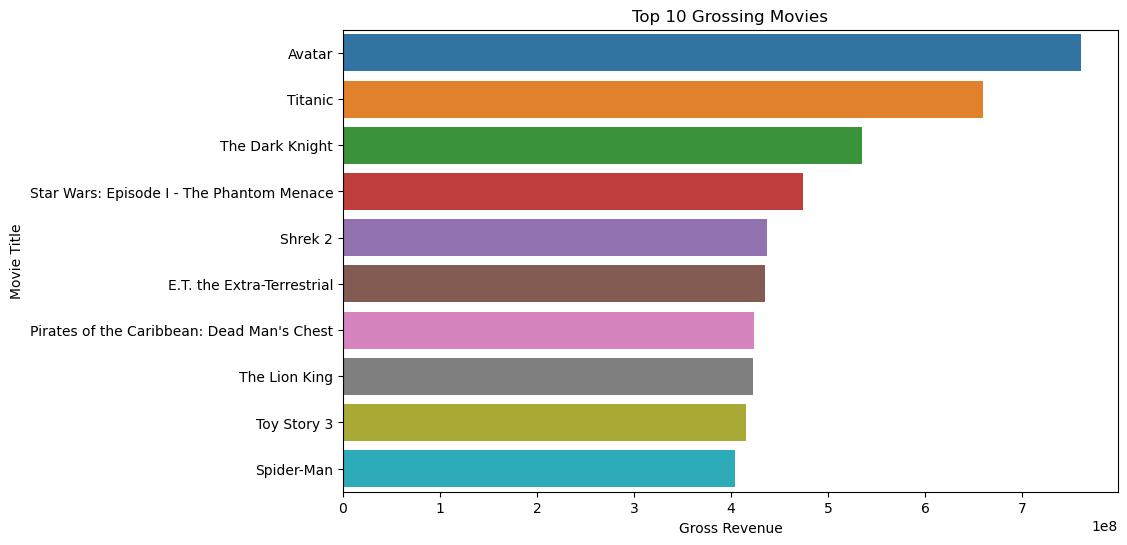

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gross', y='Movie Name', data=top10_grossing_movies)
plt.title('Top 10 Grossing Movies')
plt.xlabel('Gross Revenue')
plt.ylabel('Movie Title')
plt.show()

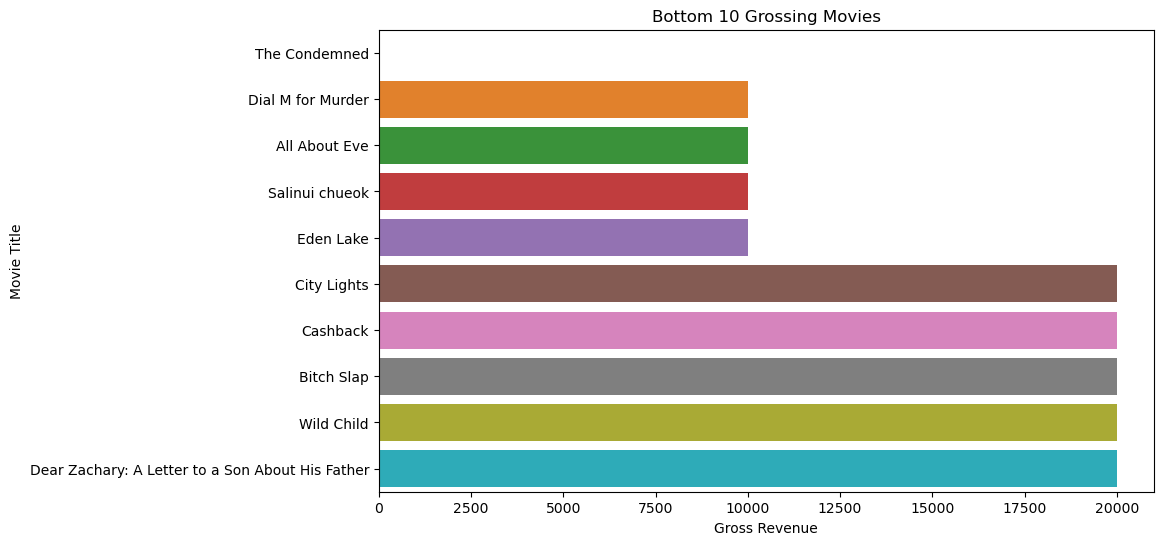

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gross', y='Movie Name', data=bottom10_grossing_movies)
plt.title('Bottom 10 Grossing Movies')
plt.xlabel('Gross Revenue')
plt.ylabel('Movie Title')
plt.show()

C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


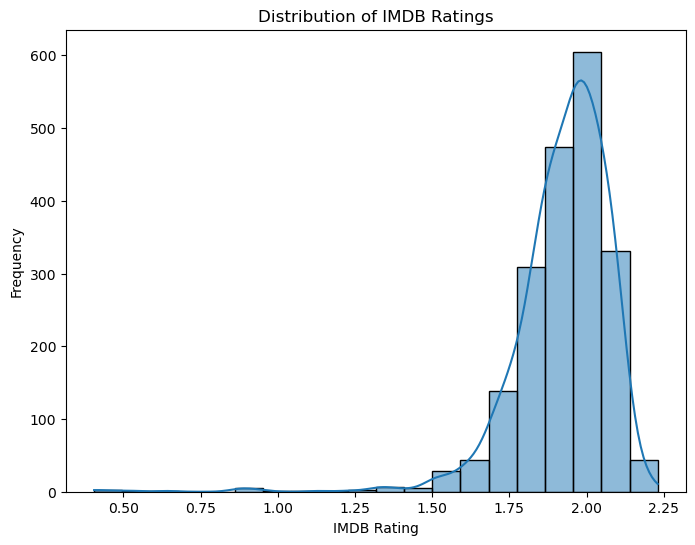

In [29]:
plt.figure(figsize=(8,6))
sns.histplot(np.log(data['IMDB Rating']), bins=20, kde=True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()

C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


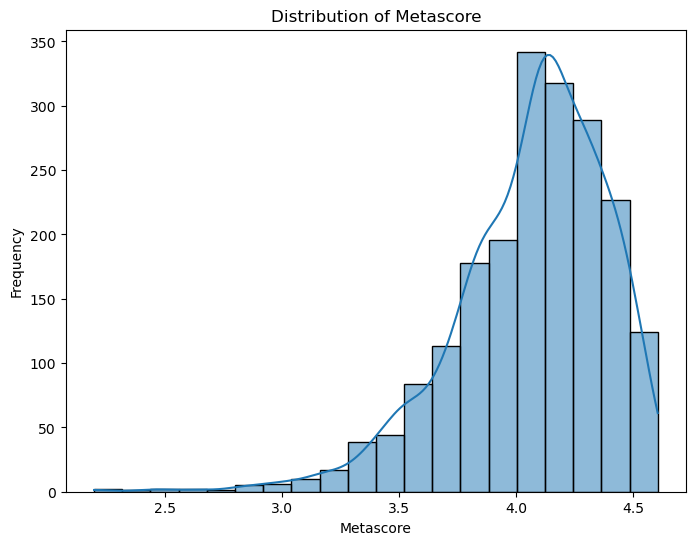

In [30]:
plt.figure(figsize=(8,6))
sns.histplot(np.log(data['Metascore']), bins=20, kde=True)
plt.title('Distribution of Metascore')
plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.show()

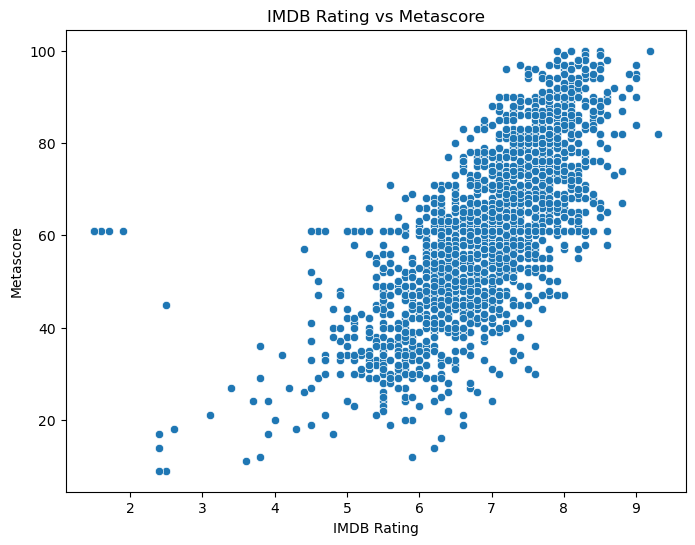

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='IMDB Rating', y='Metascore', data=data)
plt.title('IMDB Rating vs Metascore')
plt.xlabel('IMDB Rating')
plt.ylabel('Metascore')
plt.show()

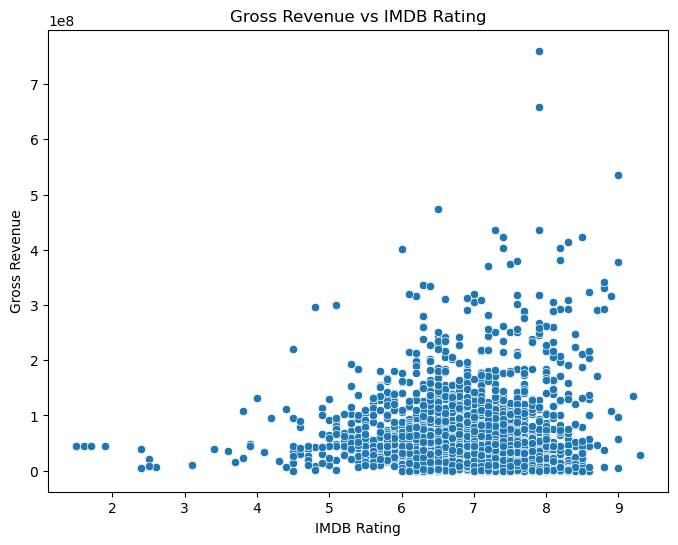

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='IMDB Rating', y='Gross', data=data)
plt.title('Gross Revenue vs IMDB Rating')
plt.xlabel('IMDB Rating')
plt.ylabel('Gross Revenue')
plt.show()

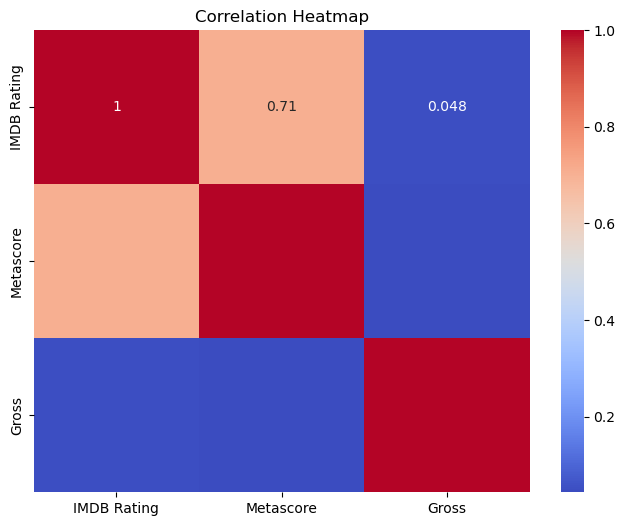

In [35]:
plt.figure(figsize=(8,6))
correlation = data[['IMDB Rating', 'Metascore', 'Gross']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


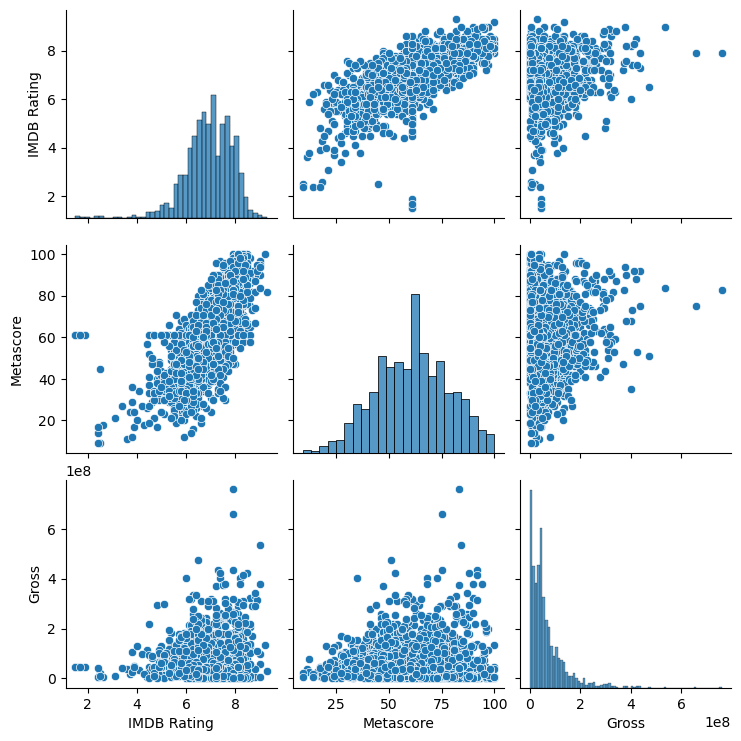

In [34]:
sns.pairplot(data[['IMDB Rating', 'Metascore', 'Gross']])
plt.show()

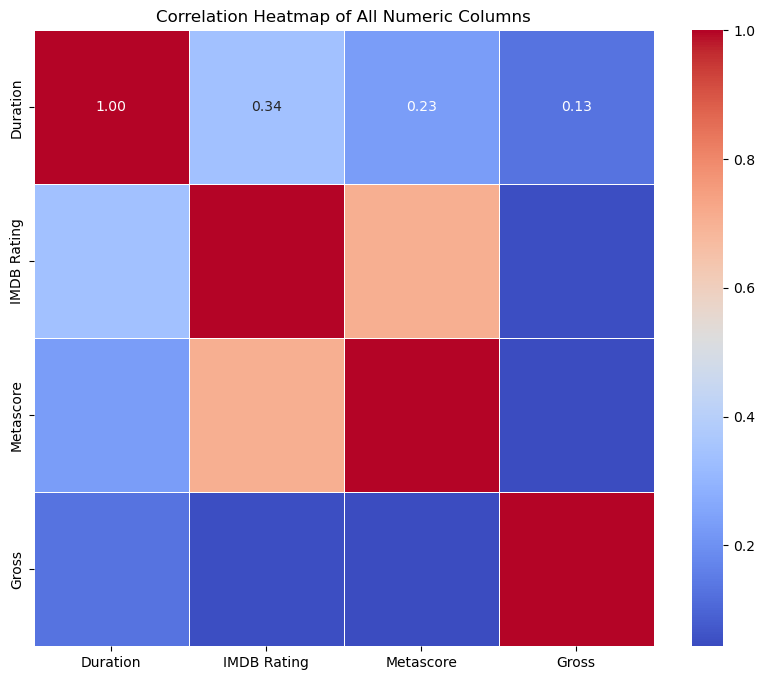

In [37]:
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(10,8))
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of All Numeric Columns')
plt.show()

C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


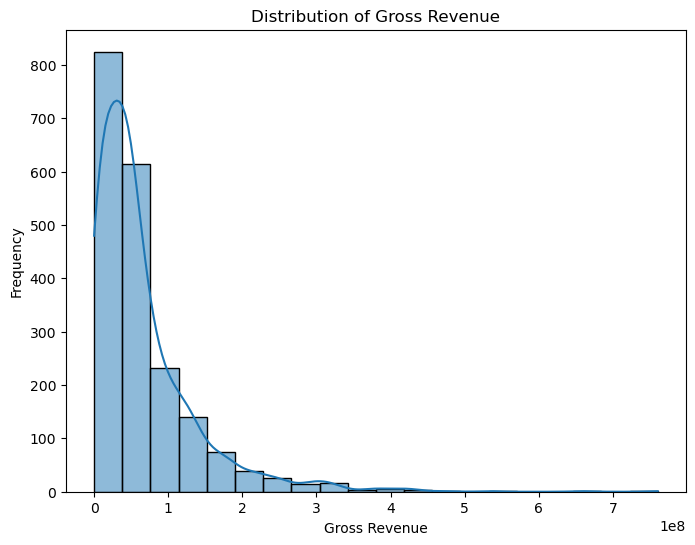

In [38]:
plt.figure(figsize=(8,6))
sns.histplot(data['Gross'], bins=20, kde=True)
plt.title('Distribution of Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Frequency')
plt.show()

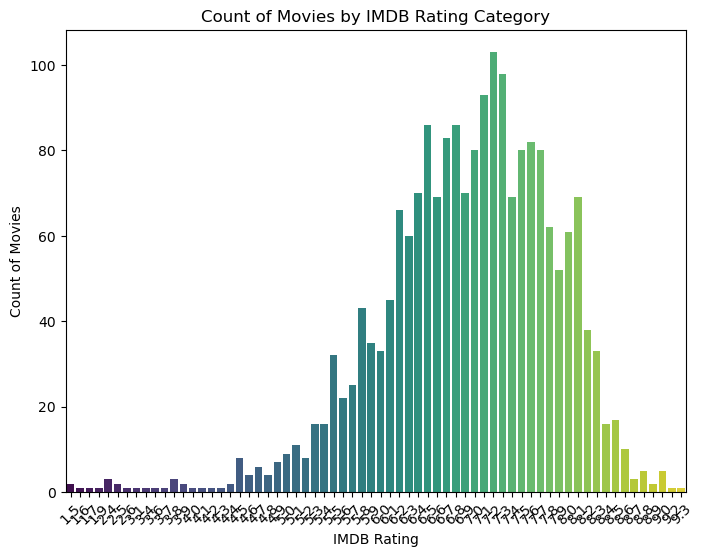

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(x='IMDB Rating', data=data, palette='viridis')
plt.title('Count of Movies by IMDB Rating Category')
plt.xlabel('IMDB Rating')
plt.ylabel('Count of Movies')
plt.xticks(rotation=45)
plt.show()

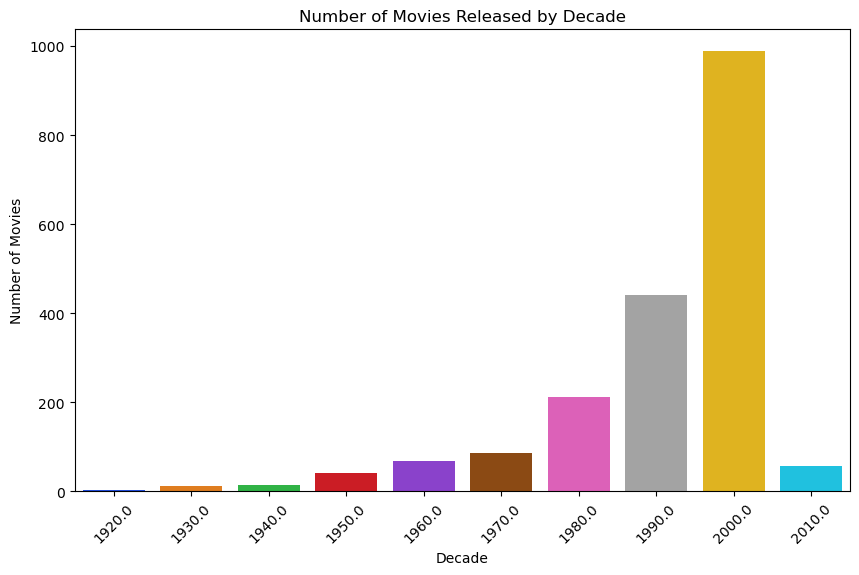

In [46]:
data['Release Year'] = pd.to_numeric(data['Release Year'], errors='coerce')

data['Decade'] = (data['Release Year'] // 10) * 10

plt.figure(figsize=(10,6))
sns.countplot(x='Decade', data=data, palette='bright')
plt.title('Number of Movies Released by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

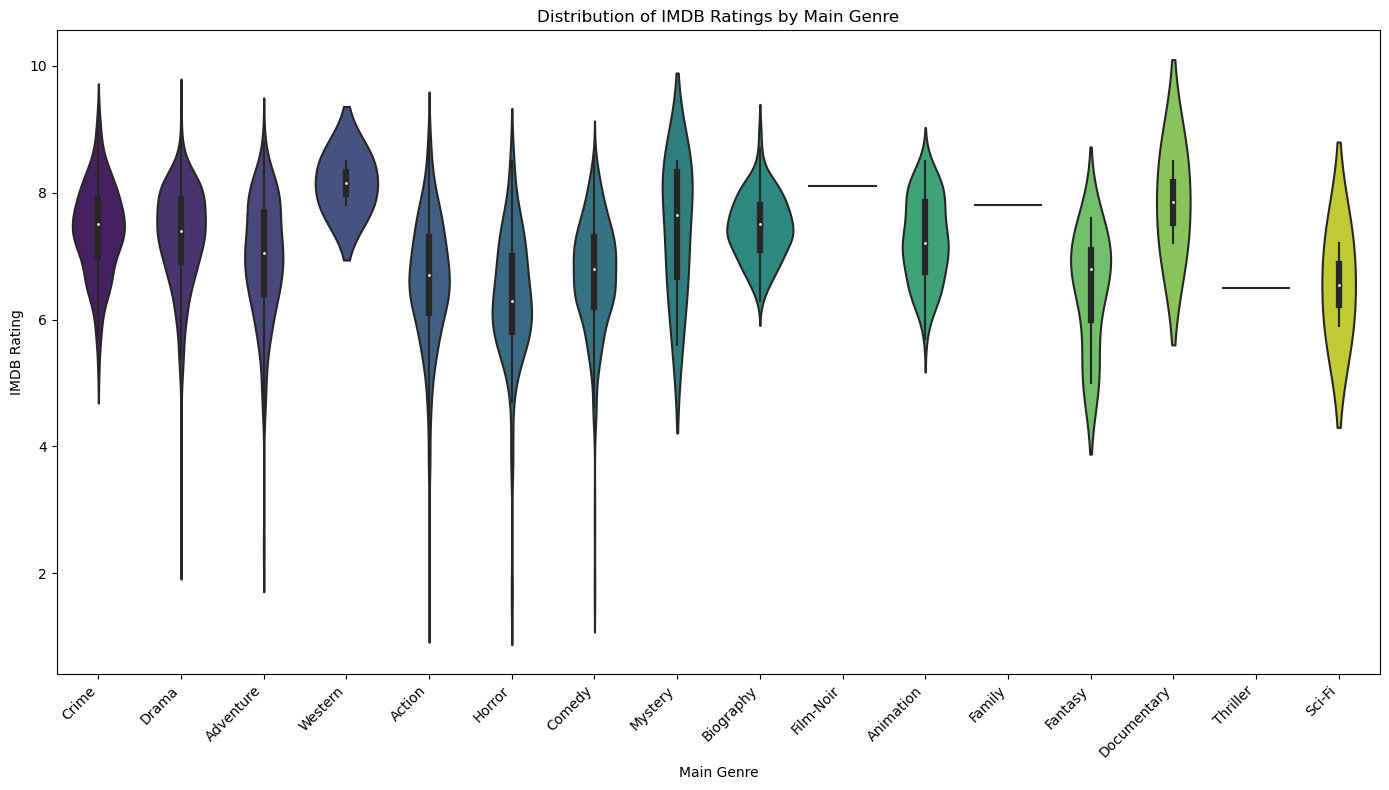

In [60]:
data['Main Genre'] = data['Genre'].apply(lambda x: x.split(',')[0])  

plt.figure(figsize=(14, 8))
sns.violinplot(x='Main Genre', y='IMDB Rating', data=data, palette='viridis')
plt.title('Distribution of IMDB Ratings by Main Genre')
plt.xlabel('Main Genre')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


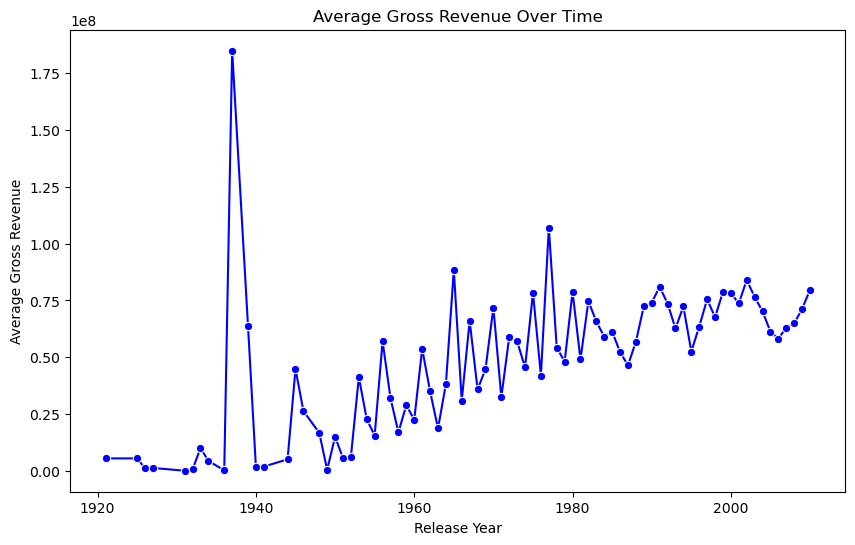

In [63]:
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

average_gross_per_year = data.groupby('Release Year')['Gross'].mean()

plt.figure(figsize=(10,6))  
sns.lineplot(x=average_gross_per_year.index, y=average_gross_per_year.values, marker='o', color='b')
plt.title('Average Gross Revenue Over Time')  
plt.xlabel('Release Year')  
plt.ylabel('Average Gross Revenue') 
plt.show() 

KMEANS ALGORITHM

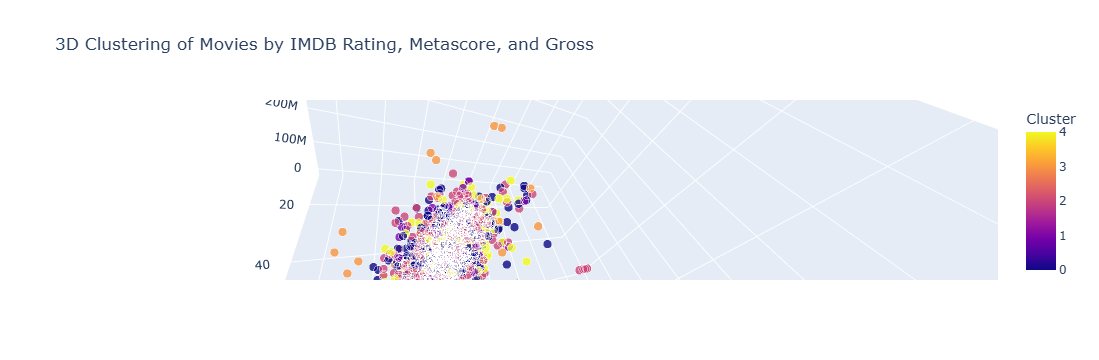

In [66]:
from sklearn.cluster import KMeans
import plotly.express as px

data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce') 

features = data[['IMDB Rating', 'Metascore', 'Gross']].dropna()

kmeans = KMeans(n_init=10, n_clusters=5, random_state=40)
data['Cluster'] = kmeans.fit_predict(features)

fig = px.scatter_3d(data, 
                    x='IMDB Rating', 
                    y='Metascore', 
                    z='Gross', 
                    color='Cluster', 
                    hover_data={'Movie Name': True},  
                    title='3D Clustering of Movies by IMDB Rating, Metascore, and Gross')


fig.update_traces(marker=dict(size=5, opacity=0.8, line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

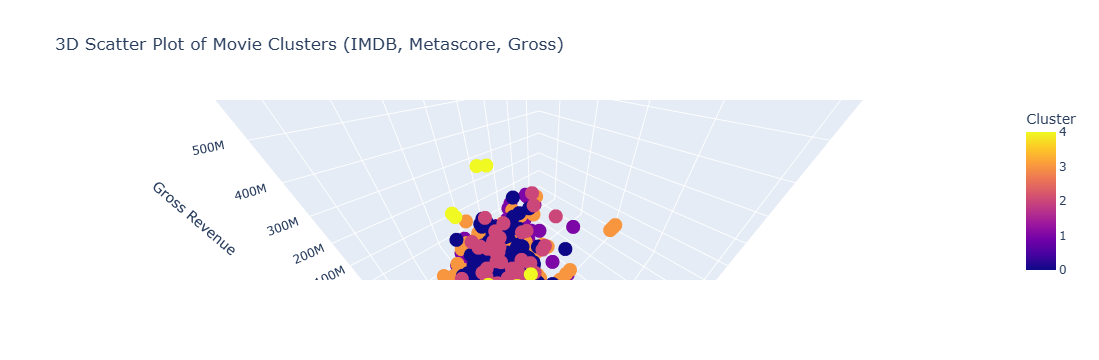

In [68]:
features = data[['IMDB Rating', 'Metascore', 'Gross']].dropna()
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(features)

fig = px.scatter_3d(data, x='IMDB Rating', y='Metascore', z='Gross', 
                    color='Cluster', 
                    labels={'IMDB Rating': 'IMDB Rating', 'Metascore': 'Metascore', 'Gross': 'Gross Revenue'},
                    title='3D Scatter Plot of Movie Clusters (IMDB, Metascore, Gross)')

fig.show()

DBSCAN ALGORITHM

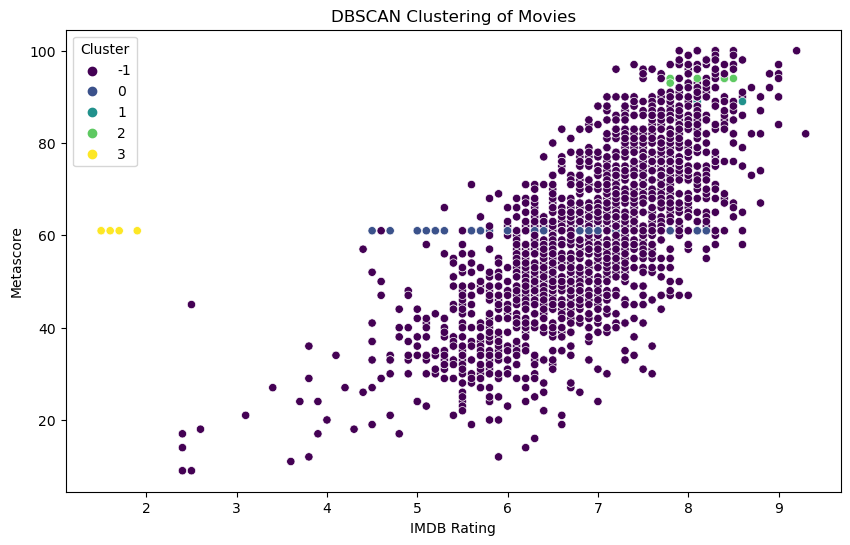

In [76]:
from sklearn.cluster import DBSCAN

features = data[['IMDB Rating', 'Metascore', 'Gross']].dropna()

dbscan = DBSCAN(eps=1, min_samples=4)
data['Cluster'] = dbscan.fit_predict(features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB Rating', y='Metascore', hue='Cluster', data=data, palette='viridis')
plt.title('DBSCAN Clustering of Movies')
plt.xlabel('IMDB Rating')
plt.ylabel('Metascore')
plt.show()